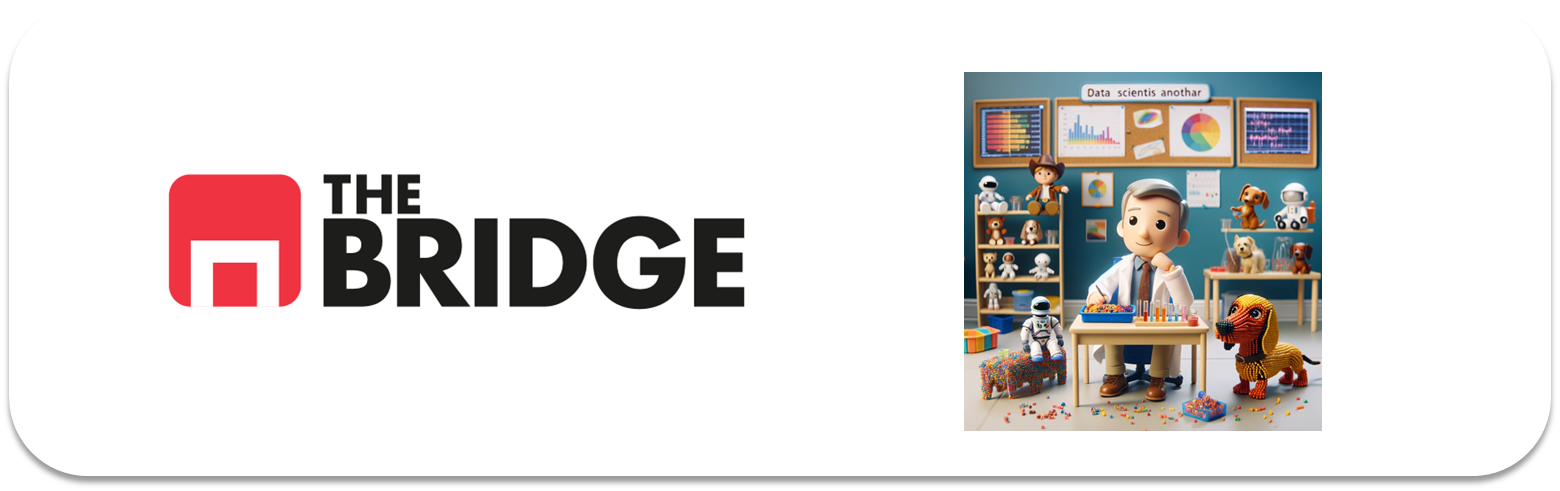

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [7]:
df_titanic = sns.load_dataset("titanic")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [8]:
df_titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
432,1,2,female,42.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
426,1,2,female,28.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
42,0,3,male,NaN,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False


In [ ]:
df_titanic.info()

#  Hay nulos en las columnas "age", solo dos en "embarked" y "embark_town" y muchísimos en "deck"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [19]:
# Mirando que pinta tienen los datos de deck, columna con mayoría de nulos

df_titanic[df_titanic["deck"].isnull() == False]["deck"]

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: deck, Length: 203, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
# Mirando que pinta tienen los datos de deck, columna con mayoría de nulos

df_titanic[df_titanic["deck"].isnull() == False]["deck"].unique()

['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
'''
Detalles sobre la columna "deck" obtenidos a través de Kaggle:

Valores comunes: "A", "B", "C", "D", "E", "F", "G". Algunas entradas pueden ser nulas, 
lo que indica que el deck no era conocido o que el pasajero no tenía cabina (por ejemplo, 
los viajeros de tercera clase en alojamientos compartidos).
'''

'\nDetalles sobre la columna obtenidos a través de Kaggle:\n\nValores comunes: "A", "B", "C", "D", "E", "F", "G". Algunas entradas pueden ser nulas, \nlo que indica que el deck no era conocido o que el pasajero no tenía cabina (por ejemplo, \nlos viajeros de tercera clase en alojamientos compartidos).\n'

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [22]:
df_titanic.drop(columns=["parch"], inplace=True)

In [24]:
percentaje_nans = (df_titanic.isnull().sum() / len(df_titanic)) * 100
percentaje_nans

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [30]:
'''
Para la columna "age" se realizará un análisis de distribución para decidir si imputar con la media o la mediana.


Para las columnas "embarked" y "embarked_town", se inspeccionará si coinciden en las mismas filas; parece que sí. 
De ser el caso, se eliminarán esas filas, ya que solo son dos.


Aunque la columna "deck" tiene casi un 80% de valores nulos, lo que sugiere datos ruidosos y posiblemente descartables, 
se ha decidido mantenerla e imputar con "No hay información", ya que estas referencias reflejan la clase económica de 
los pasajeros y podrían ser relevantes en el conjunto de datos.
'''


'\nPara la columna "age" se realizará un análisis de distribución para decidir si imputar con la media o la mediana.\n\n\nPara las columnas "embarked" y "embarked_town", se inspeccionará si coinciden en las mismas filas; parece que sí. \nDe ser el caso, se eliminarán esas filas, ya que solo son dos.\n\n\nAunque la columna "deck" tiene casi un 80% de valores nulos, lo que sugiere datos ruidosos y posiblemente descartables, \nse ha decidido mantenerla e imputar con "No hay información", ya que estas referencias reflejan la clase económica de \nlos pasajeros y podrían ser relevantes en el conjunto de datos.\n'

In [ ]:
df_titanic[df_titanic["embark_town"].isnull() == True]

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [ ]:
# Drop das filas de índices 61 y 

df_titanic.dropna(subset=["embark_town"], inplace=True)

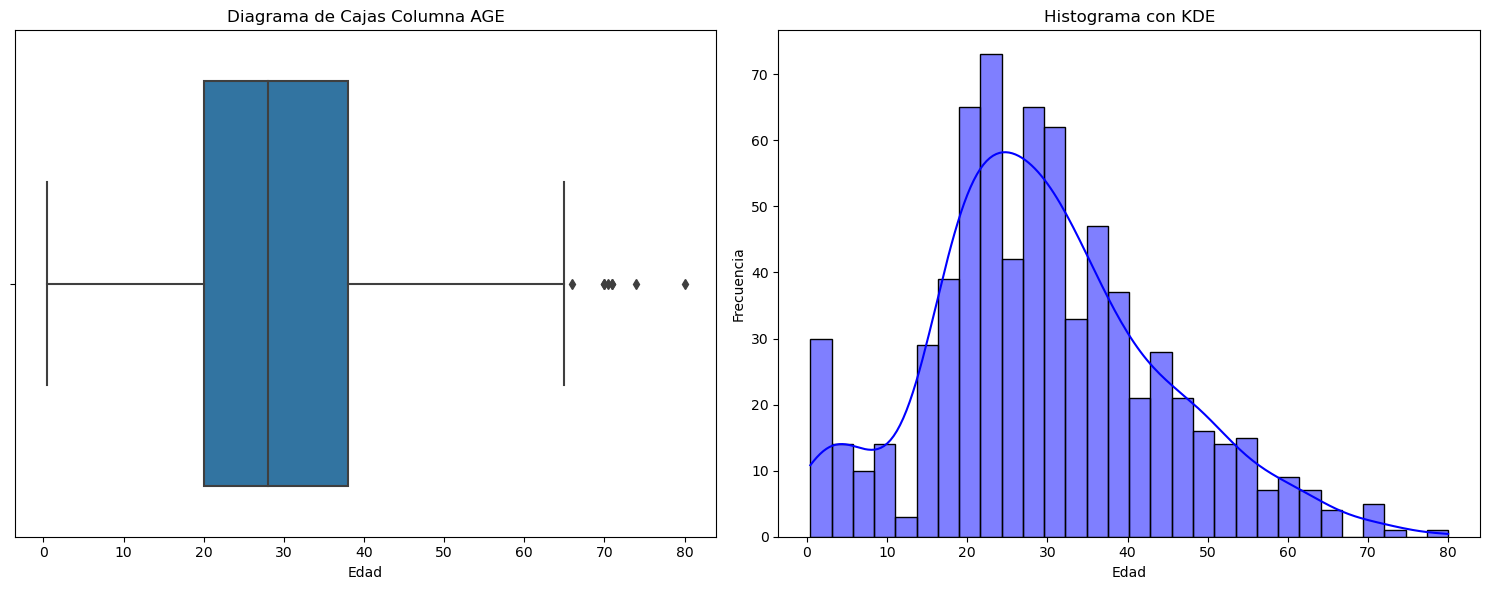

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  

sns.boxplot(x=df_titanic['age'], ax=axes[0])
axes[0].set_title('Diagrama de Cajas Columna AGE')
axes[0].set_xlabel('Edad')

sns.histplot(df_titanic['age'], kde=True, bins=30, color='blue', ax=axes[1])
axes[1].set_title('Histograma con KDE')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [42]:
'''
Observaciones: Hay algunos valores atípicos para edades mayores que la media, pero no inferiores a ella. 
Sin embargo, aún así existe una leve asimetría hacia la izquierda, es decir, la mayoría de los valores 
están por debajo de la media. Por lo tanto, se imputará con la mediana, aunque la decisión ha sido difícil."
'''

'\nObservaciones: Hay algunos valores atípicos para edades mayores que la media, pero no inferiores a ella. \nSin embargo, aún así existe una leve asimetría hacia la izquierda, es decir, la mayoría de los valores \nestán por debajo de la media. Por lo tanto, se imputará con la mediana, aunque la decisión ha sido difícil."\n'

In [43]:
df_titanic['age'].fillna(df_titanic['age'].median(), inplace=True)

In [52]:
df_titanic['deck'] = df_titanic['deck'].cat.add_categories(['Desconhecido'])
df_titanic['deck'].fillna('Desconhecido', inplace=True)

In [53]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   fare         889 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        889 non-null    category
 8   who          889 non-null    object  
 9   adult_male   889 non-null    bool    
 10  deck         889 non-null    category
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(5)
memory usage: 80.4+ KB


In [ ]:
df_titanic.sample(5)

# Se parece todo bien

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
97,1,1,male,23.0,0,63.3583,C,First,man,True,D,Cherbourg,yes,False
518,1,2,female,36.0,1,26.0000,S,Second,woman,False,Desconhecido,Southampton,yes,False
422,0,3,male,29.0,0,7.8750,S,Third,man,True,Desconhecido,Southampton,no,True
726,1,2,female,30.0,3,21.0000,S,Second,woman,False,Desconhecido,Southampton,yes,False
707,1,1,male,42.0,0,26.2875,S,First,man,True,E,Southampton,yes,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.



<div align="center">

| Columna/Variable    | Descripción                                                                 |
| ------------------- | --------------------------------------------------------------------------- |
| survived            | Indica se o passageiro sobreviveu (1) ou não (0).                           |
| pclass              | Classe de embarque do passageiro (1, 2, 3).                                 |
| sex                 | Sexo do passageiro (male, female).                                          |
| age                 | Idade do passageiro.                                                        |
| sibsp               | Número de irmãos ou cônjuges a bordo.                                       |
| fare                | Tarifa paga pelo passageiro.                                                |
| embarked            | Porto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).         |
| class               | Classe da cabine (First, Second, Third).                                    |
| who                 | Categoria do passageiro (man, woman).                                       |
| adult_male          | Indica se o passageiro é um homem adulto (True/False).                      |
| deck                | Deck onde o passageiro estava (A, B, C, etc., ou Desconhecido).            |
| embark_town         | Cidade de embarque do passageiro (Cherbourg, Southampton, etc.).            |
| alive               | Indica se o passageiro está vivo (yes) ou morto (no).                       |
| alone               | Indica se o passageiro estava sozinho (True/False). 

</div>



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [64]:
diccio = {"C": "Cherburgo", "Q": "Queenstown", "S": "Southampton"}

df_titanic["embarked"] = df_titanic["embarked"].replace(diccio)


In [65]:
df_titanic["embarked"].unique()

array(['Southampton', 'Cherburgo', 'Queenstown'], dtype=object)

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [66]:
# Funciones utilizadas en el Workout

In [85]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        df[col] = df[col].dropna()  # Remove valores nulos antes de processar
        df[col] = df[col].astype('category')  # Converte para tipo categórico, se necessário

        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis')
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis')
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        if j < len(axes):
            axes[j].axis('off')

    plt.tight_layout()
    plt.show()

### #2.1 Categóricas

In [88]:
variables_categoricas = [
    "survived",
    "sex",
    "embarked",
    "class",
    "who",
    "adult_male",
    "deck",
    "embark_town",
    "alive",
    "alone",
]

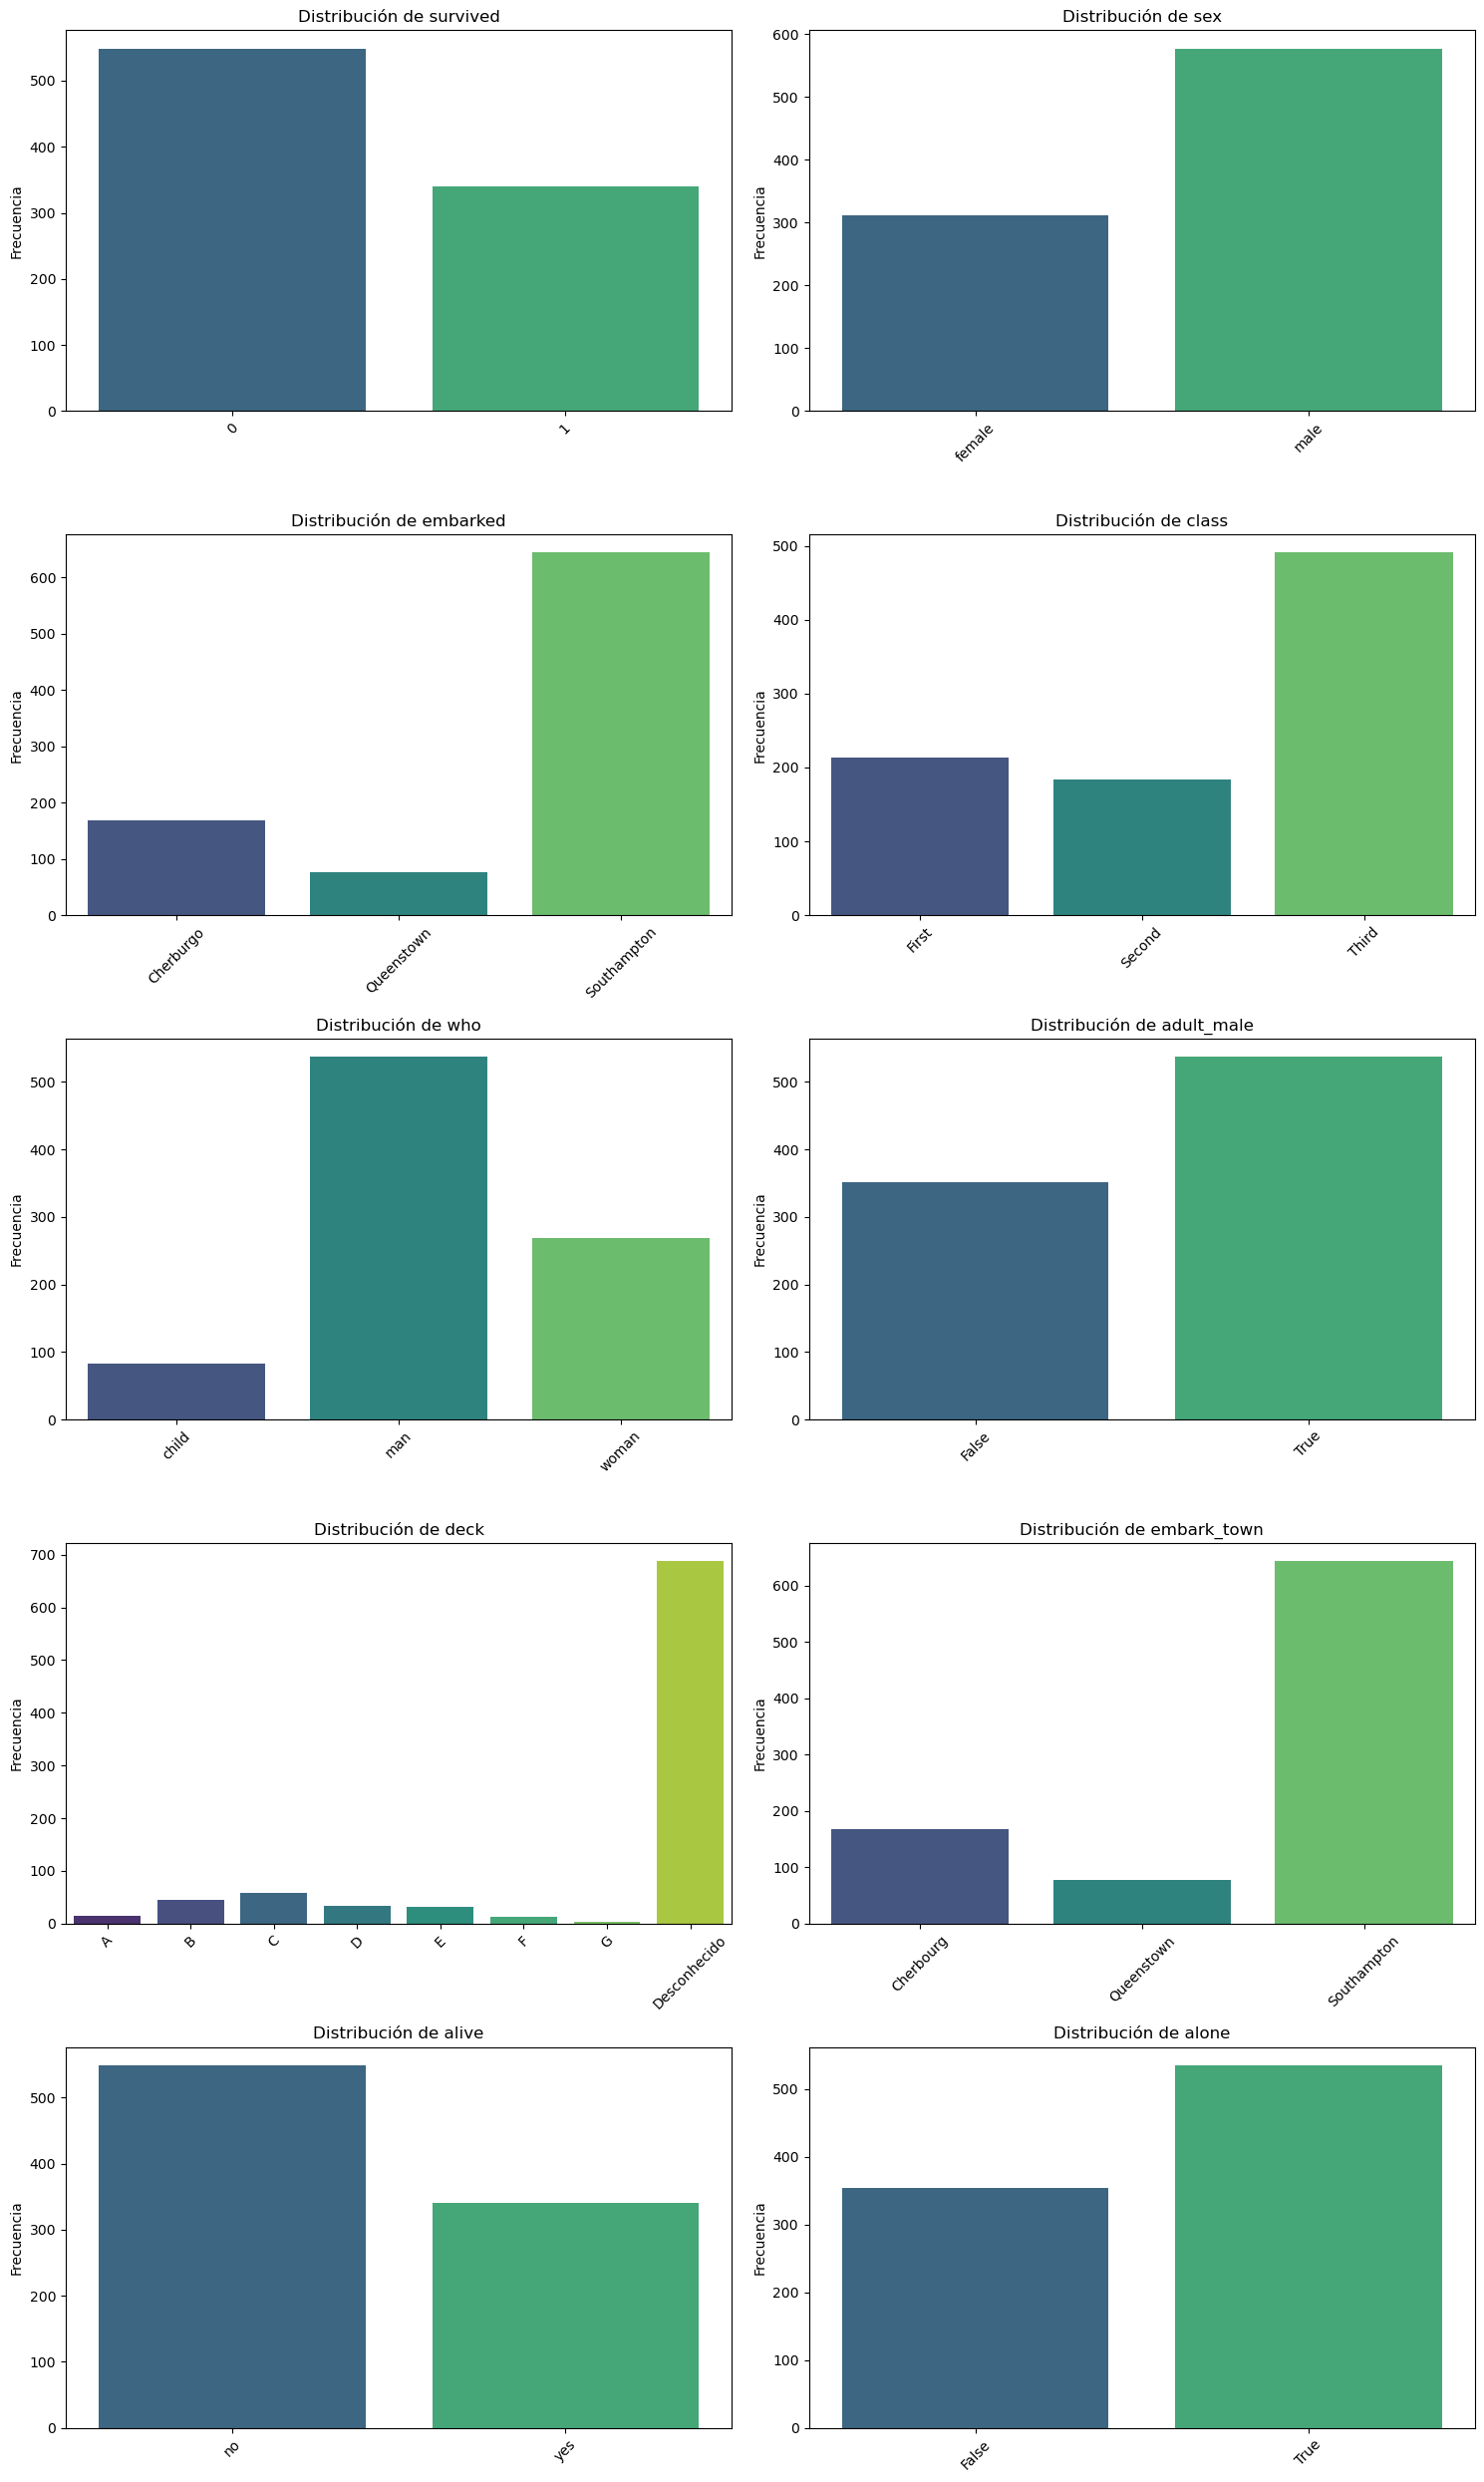

In [89]:
pinta_distribucion_categoricas(df_titanic, variables_categoricas)

### #2.2 Numéricas

In [91]:
variables_numericas = ["pclass",
    "age",
    "fare",
]

(3, 2)


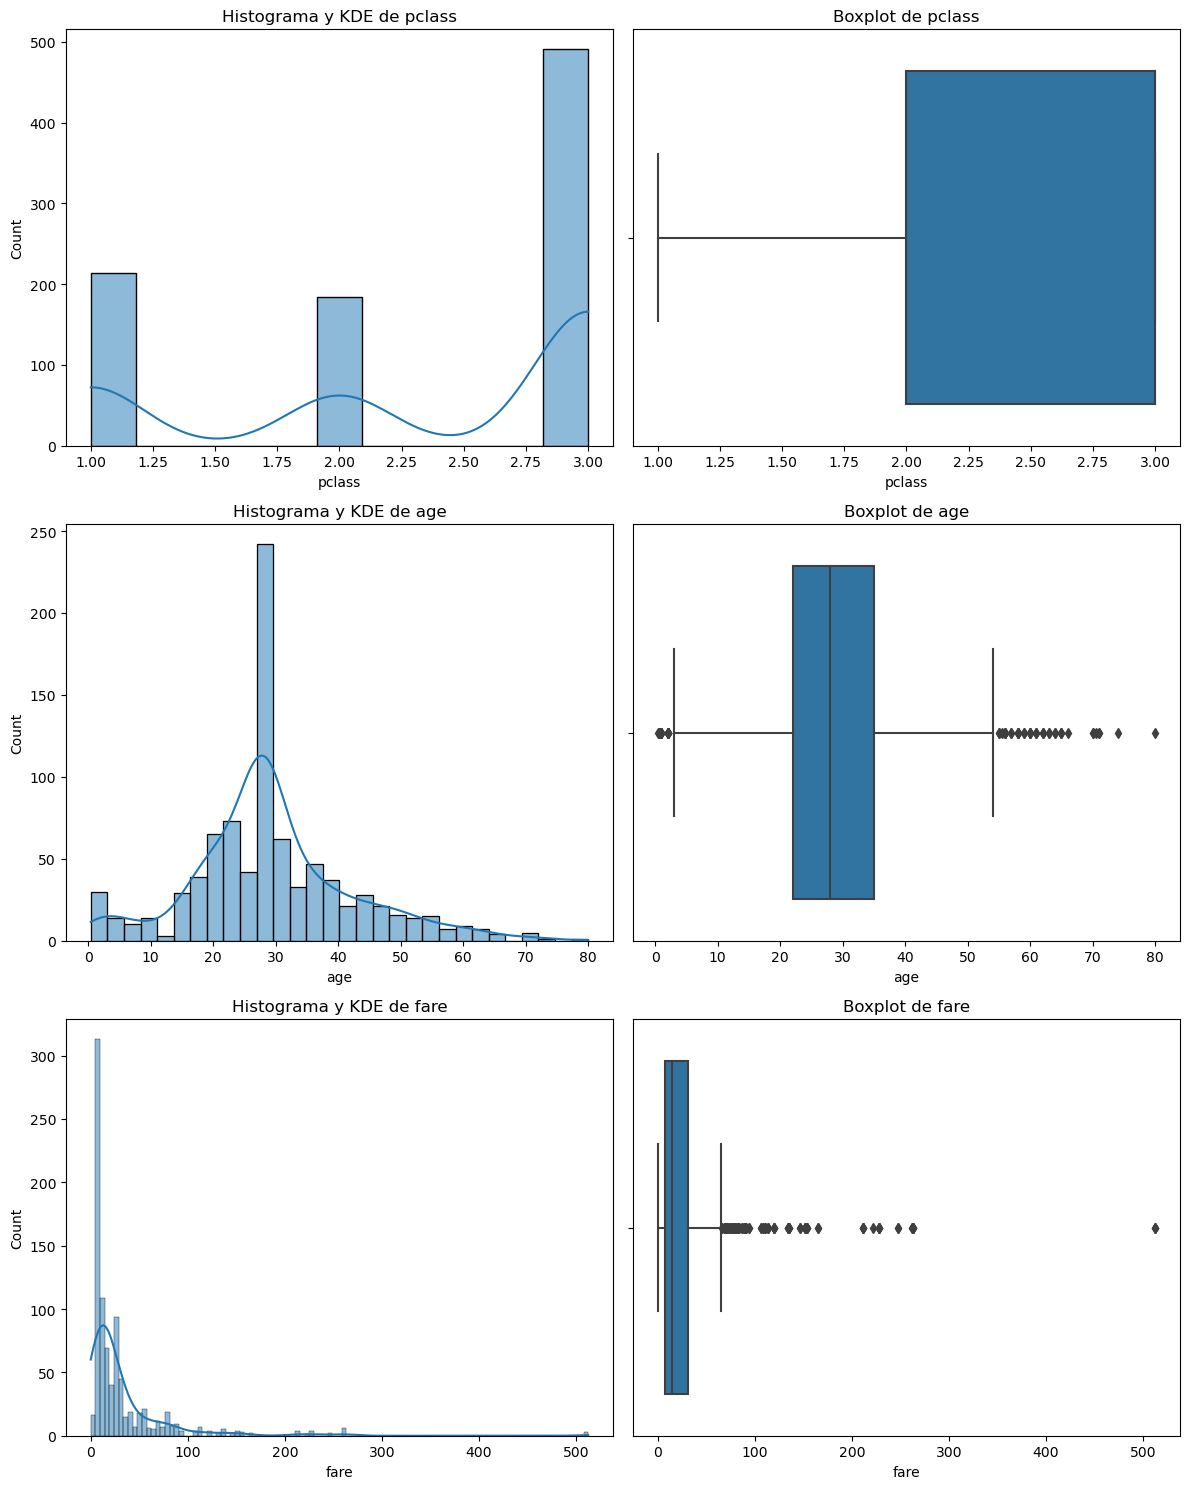

In [92]:
plot_combined_graphs(df_titanic, variables_numericas)

In [ ]:
'''
OBSERVACIONES GENERALES:

Había muchos más hombres adultos que cualquier otro tipo de personas (mujeres y niños).

Hay más personas de tercera clase que de primera y segunda, lo que podría ayudar a explicar parcialmente el excesivo número de NANs en "deck", ya que aparentemente la tercera clase no tenía cubierta.

Hay muchos más embarques en Southampton, aunque esto no parece ser algo relevante.

Más personas murieron que sobrevivieron.

Más personas viajaron solas que acompañadas.

Hay una mayoría de pasajeros alrededor de los 30 años, aunque la curva de distribución es bastante definida.

La tarifa pagada por los pasajeros varía mucho y tiene muchos outliers, como era de esperar, generando una distribución asimétrica con la mayoría concentrada a la izquierda.
'''

'\nObservaciones Generales:\n\nHabía muchos más hombres adultos que cualquier otro tipo de personas (mujeres y niños).\n\nHay más personas de tercera clase que de primera y segunda, lo que podría ayudar a explicar parcialmente el excesivo número de NANs en "deck", ya que aparentemente la tercera clase no tenía cubierta.\n\nHay muchos más embarques en Southampton, aunque esto no parece ser algo relevante.\n\nMás personas murieron que sobrevivieron.\n\nMás personas viajaron solas que acompañadas.\n\nHay una mayoría de pasajeros alrededor de los 30 años, aunque la curva de distribución es bastante definida.\n\nLa tarifa pagada por los pasajeros varía mucho y tiene muchos outliers, como era de esperar, generando una distribución asimétrica con la mayoría concentrada a la izquierda.\n'

In [ ]:
'''
POSIBLES PREGUNTAS:

¿La proporción de sobrevivientes hombres, mujeres y niños es similar a la proporción total de pasajeros?

¿La proporción de primera, segunda y tercera clase es similar a la proporción total de pasajeros?
'''

'\nPosibles preguntas:\n\n¿La proporción de sobrevivientes hombres, mujeres y niños es similar a la proporción total de pasajeros?\n¿La proporción de primera, segunda y tercera clase es similar a la proporción total de pasajeros?\n'

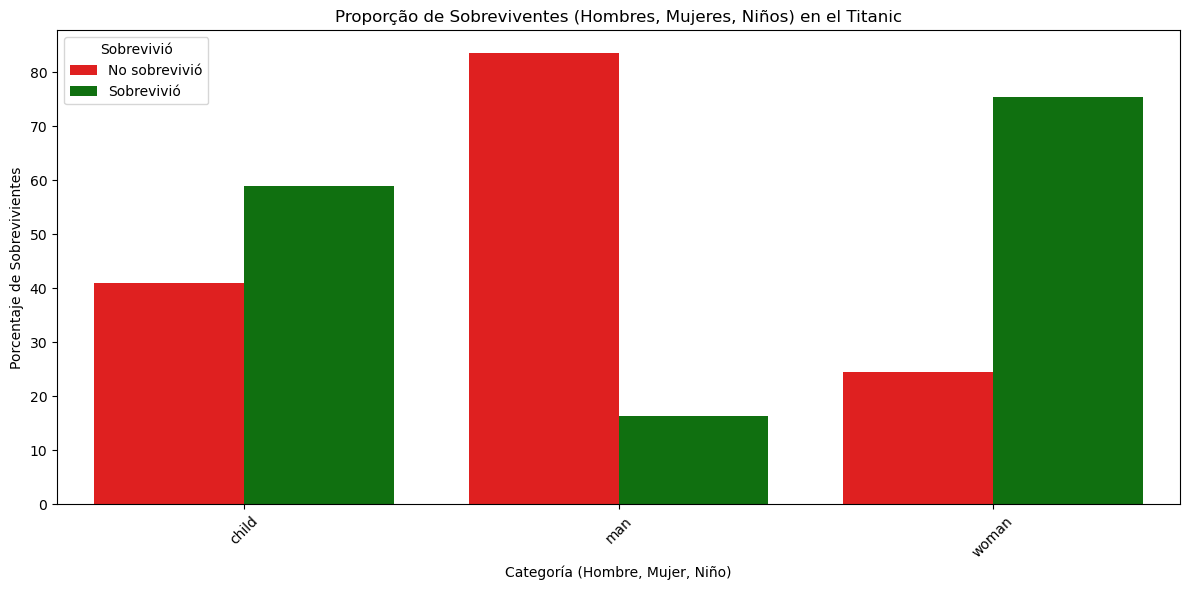

In [99]:
df_titanic['who_survived'] = df_titanic['who'].astype(str) + '_' + df_titanic['survived'].astype(str)

count_data = df_titanic.groupby(['who', 'survived']).size().reset_index(name='count')

count_data['percentage'] = count_data.groupby('who')['count'].transform(lambda x: x / x.sum() * 100)

palette = {0: 'red', 1: 'green'}

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='who', y='percentage', hue='survived', data=count_data, palette=palette)

plt.title('Proporção de Sobreviventes (Hombres, Mujeres, Niños) en el Titanic')
plt.xlabel('Categoría (Hombre, Mujer, Niño)')
plt.ylabel('Porcentaje de Sobrevivientes')
plt.xticks(rotation=45)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No sobrevivió', 'Sobrevivió'], title='Sobrevivió')

plt.tight_layout()
plt.show()

In [ ]:
# Se puede notar que la mayoría de mujeres y niños sobreviveran y los hombres no

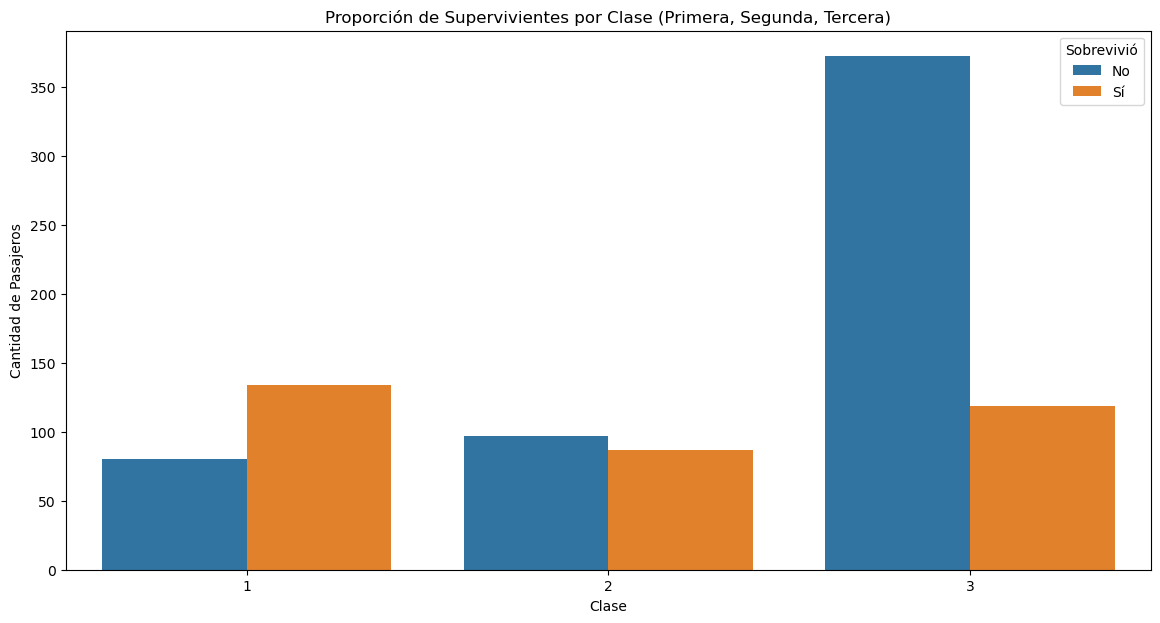

In [101]:
plt.figure(figsize=(14, 7))

# Gráfico de barras para cada clase (1, 2, 3) en relación a la supervivencia
sns.countplot(x='pclass', hue='survived', data=df_titanic)

# Agregar título y etiquetas
plt.title('Proporción de Supervivientes por Clase (Primera, Segunda, Tercera)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])

# Mostrar el gráfico
plt.show()

In [102]:
# Como ya estaba claro, los que más sobrevivieron fueran los de primera clase y los que murrieran de tercera